In [178]:
%reset -f

In [219]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import pandas as pd
import random
from scipy import stats
from statsmodels.stats.weightstats import ztest

In [199]:
# Function to plot tg and cg
def print_tg_cg(tg, cg):
    # Calculating mean values for Target and Control Groups
    tg_mean = np.mean(tg)
    cg_mean = np.mean(cg)

    df_tg = pd.DataFrame({'Flag':tg, 'Group':'TG'})
    df_cg = pd.DataFrame({'Flag':cg, 'Group':'CG'})
    df = pd.concat([df_tg, df_cg], axis=0)
    # Creating Distributions plot for our arrays
    fig, ax = plt.subplots(figsize=(10,6))
    
    sns.countplot(df['Flag'], hue=df['Group'])

    plt.title('#Of color changes')
    plt.legend()
    plt.xlabel(' ')
    plt.ylabel(' ')
    # Adding annotations
    # ax.annotate(str(round(tg_mean,0)), xy=(tg_mean, 0), xytext=(tg_mean, 0), arrowprops=dict(facecolor='b', shrink=0.05),)
    # ax.annotate(str(round(cg_mean,0)), xy=(cg_mean, 0), xytext=(cg_mean, 0), arrowprops=dict(facecolor='g', shrink=0.05),)

    # # Saving plot
    fig.savefig('distplot_binomial.png')

    plt.show()

#### Pre-campaigns arrangements 

In [208]:
mu_0 = 0.3
sigma = mu_0*(1-mu_0)

\begin{equation*}
d = \frac{|{\mu_{0}-\mu}|}{\sigma}
\end{equation*}

In [209]:
d = 0.1/sigma

In [210]:
# Creating two normally distributed arrays for Target and Control Groups
tg_size = 50
cg_size = 50


np.random.seed(13)
tg = np.random.binomial(n=1, p=0.31, size=tg_size)
np.random.seed(15)
cg = np.random.binomial(n=1, p=0.36, size=cg_size)

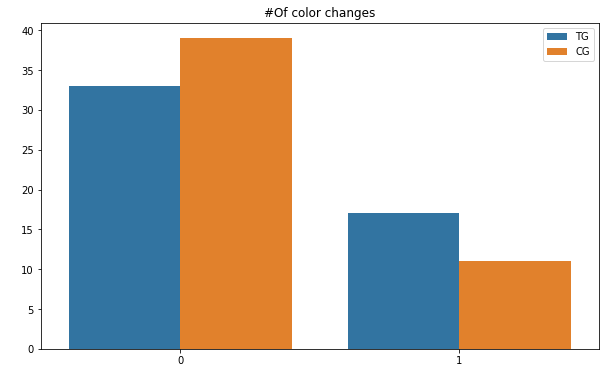

In [211]:
print_tg_cg(tg, cg)

#### Z-test

\begin{equation*}
Z = \frac{\hat{p}_{tg} - \hat{p}_{cg}}{\sqrt{\frac{s_{tg}}{n_{tg}}+\frac{s_{cg}}{n_{cg}}}}
\end{equation*}

In [212]:

ztest(tg, cg)

(1.3348476249438297, 0.1819262225944932)

#### Chi-squared test

In [213]:
len(tg)-np.sum(tg), np.sum(tg)

(33, 17)

In [214]:
len(cg)-np.sum(cg), np.sum(cg)

(39, 11)

In [16]:
(17+11)/100

0.28

In [17]:
0.28*50

14.000000000000002

In [215]:
g, p, dof, expctd = stats.chi2_contingency([[33, 17], [39, 11]], correction=False)

In [216]:
p

0.18144920772141646

\begin{equation*}
\chi^2 = \sum{\frac{(O-E)^2}{E}} 
\end{equation*}

\begin{equation*}
\chi^2 = \frac{(33-36)^2}{36}+\frac{(39-36)^2}{36}+\frac{(17-14)^2}{14}+\frac{(11-14)^2}{14} \approx 1.8
\end{equation*}

In [217]:
(33-36)**2/36+(39-36)**2/36+(17-14)**2/14+(11-14)**2/14

1.7857142857142856

#### Comparing Z and Chi

In [218]:
def get_tests_results(tg, cg):
    tg_1, tg_0 = np.sum(tg), len(tg) - np.sum(tg)
    cg_1, cg_0 = np.sum(cg), len(tg) - np.sum(cg)
    
    Z_stat, z_p_value = ztest(tg, cg)
    Chi_stat_f, chi_p_value_f, dof_f, expctd_f = stats.chi2_contingency([[tg_0, tg_1], [cg_0, cg_1]], correction=False)
    Chi_stat_t, chi_p_value_t, dof_t, expctd_t = stats.chi2_contingency([[tg_0, tg_1], [cg_0, cg_1]], correction=True)
    
    return z_p_value, chi_p_value_f, chi_p_value_t

In [286]:
def get_tg_cg(size=100):
    
    tg_size = size
    cg_size = size
    
    p_tg = np.random.normal(loc=50.0, scale=2.0, size=1)[0]
    p_cg = np.random.normal(loc=p_tg, scale=10.0, size=1)[0]

    tg = np.random.binomial(n=1, p=p_tg/100, size=tg_size)
    cg = np.random.binomial(n=1, p=p_cg/100, size=cg_size)
    
    return tg, cg

In [287]:
res = pd.DataFrame(columns=['rn', 'tg_mean', 'cg_mean', 'z_p_value', 'chi_p_value_f', 'chi_p_value_t'])

for i in range(1000):
    tg, cg = get_tg_cg(100)
    tg_mean, cg_mean = np.mean(tg), np.mean(cg)
    z_p_value, chi_p_value_f, chi_p_value_t = get_tests_results(tg, cg)
    
    res.loc[res.shape[0]] = [i, tg_mean, cg_mean, z_p_value, chi_p_value_f, chi_p_value_t]
    

In [288]:
res.head()

,rn,tg_mean,cg_mean,z_p_value,chi_p_value_f,chi_p_value_t
0,0.0,0.51,0.43,0.257899,0.257041,0.321326
1,1.0,0.59,0.48,0.118485,0.118887,0.156281
2,2.0,0.51,0.45,0.397286,0.395766,0.479148
3,3.0,0.52,0.52,1.000000,1.000000,1.000000
4,4.0,0.47,0.75,0.000025,0.000049,0.000091


In [293]:
res['z_res'] = np.where(res['z_p_value']<0.05, 'H1', 'H0')
res['chi_f_res'] = np.where(res['chi_p_value_f']<0.05, 'H1', 'H0')
res['chi_t_res'] = np.where(res['chi_p_value_t']<0.05, 'H1', 'H0')

##### with False

In [294]:
res[res['z_res']!=res['chi_f_res']]

,rn,tg_mean,cg_mean,z_p_value,chi_p_value_f,chi_p_value_t,z_res,chi_f_res,chi_t_res


##### with True

In [295]:
res[res['z_res']!=res['chi_t_res']].shape

(34, 9)

##### False with True

In [296]:
res[res['chi_t_res']!=res['chi_f_res']].shape

(34, 9)

In [303]:
res[(res['z_res']=='H0') & (res['chi_t_res']=='H1')].shape

(0, 9)

In [304]:
res[(res['z_res']=='H1') & (res['chi_t_res']=='H0')].shape

(34, 9)

In [305]:
34/253

0.13438735177865613

C:\Users\a_abdraimov\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


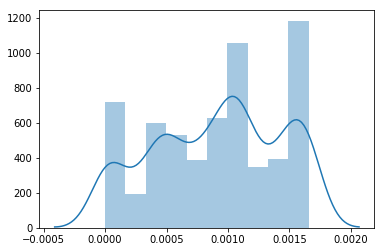

In [297]:
sns.distplot(np.abs(res['z_p_value'] - res['chi_p_value_f']))

C:\Users\a_abdraimov\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


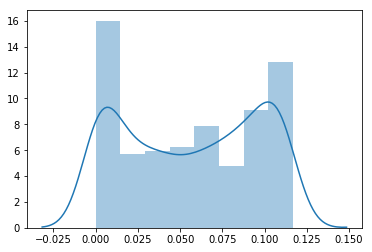

In [298]:
sns.distplot(np.abs(res['z_p_value'] - res['chi_p_value_t']))

In [300]:
res['z_res'].value_counts()

H0    747
H1    253
Name: z_res, dtype: int64